# Plotting global productivity of the A- and NP-slots, based on their type count and probability of encountering neologisms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("PATH_TO//English.csv", sep="\t", index_col=False)

Count all the A and NP types and convert into a data frame

In [3]:
adj_types = data["WORD_SLOT1"].value_counts().rename_axis("A_TYPES").reset_index(name="V")
np_types = data["WORD_SLOT2"].value_counts().rename_axis("NP_TYPES").reset_index(name="V")

Calculate the number of all co-occurrences of NPs for each A-subscheme and all co-occurrences of As for each NP-Subscheme

In [4]:
Aco_occurences = data.groupby(['WORD_SLOT1', 'WORD_SLOT2']).size().rename_axis(["A_SCHEMES", "ATTRACTED_NPs"]).reset_index(name='OCCURENCES')
NPco_occurences = data.groupby(['WORD_SLOT2', 'WORD_SLOT1']).size().rename_axis(["NP_SCHEMES", "ATTRACTED_As"]).reset_index(name='OCCURENCES')

Function to collect hapax legomena in a dictionary, based on the data from (A/NP)co-occurrence df

In [5]:
def hapax_harvest(lookup_df, col):
    types = set(lookup_df[col].tolist())
    dictionary = {}
    
    for item in types:
        hapax = lookup_df[(lookup_df[col] == item) & (lookup_df['OCCURENCES'] == 1)]
        hapax_n = hapax.shape[0]
        dictionary[item] = hapax_n
        
    return dictionary

In [6]:
A_dict = hapax_harvest(Aco_occurences, 'A_SCHEMES')
NP_dict = hapax_harvest(NPco_occurences, 'NP_SCHEMES')

Compute potential and global productivity for each NP and A and integrate the output into the corresponding df

In [7]:
def productivity(df, slot, dicti):
    token_count = 904
    
    df['HAPAX_LEGOMENA_'+slot] = df[slot+'_TYPES'].map(dicti)
    df['POTENTIAL_PRODUCTIVITY_'+slot] = df['HAPAX_LEGOMENA_'+slot] / token_count
    df['GLOBAL_PRODUCTIVITY_'+slot] = df['V'] / df['POTENTIAL_PRODUCTIVITY_'+slot]
    
productivity(np_types, 'NP', NP_dict)
productivity(adj_types, 'A', A_dict)

## Plotting global productivity

Create a list of labels for each NP and A

In [8]:
adj_label = adj_types['A_TYPES'].tolist()
np_label = np_types['NP_TYPES'].tolist()

Scatter plot of global productivity for NPs and As

Text(0, 0.5, 'Type count')

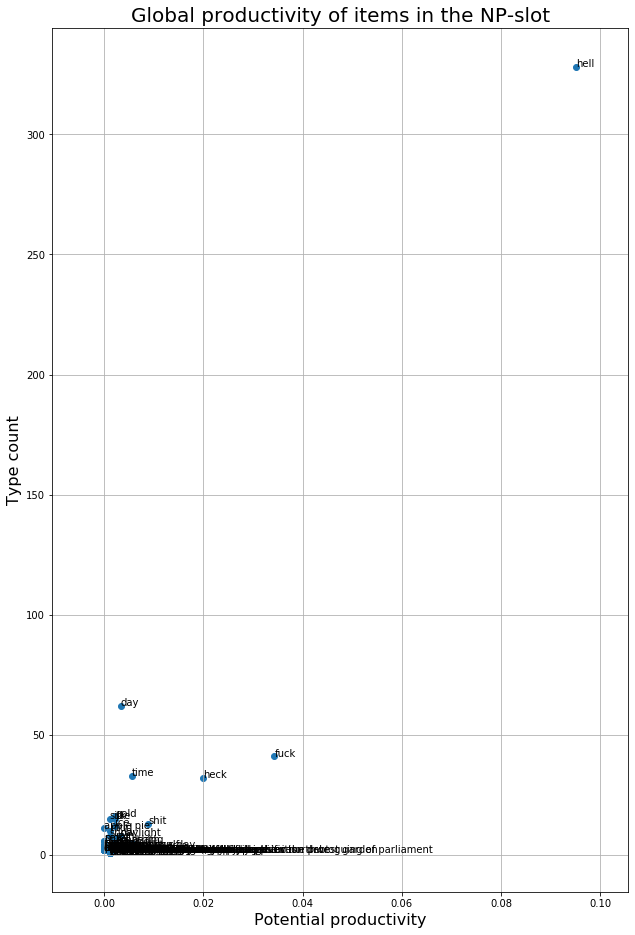

In [9]:
fig=plt.figure(figsize=(8, 4))
ax_np=fig.add_axes([0, 0.6, 1, 3])
ax_np.scatter(np_types['POTENTIAL_PRODUCTIVITY_NP'], np_types['V'])
plt.grid()

for i, txt in enumerate(np_label):
    ax_np.annotate(txt, (np_types['POTENTIAL_PRODUCTIVITY_NP'].tolist()[i], np_types['V'].tolist()[i]))
    
plt.title("Global productivity of items in the NP-slot", fontsize=20)
plt.xlabel("Potential productivity", fontsize=16)
plt.ylabel("Type count", fontsize=16)

Text(0, 0.5, 'Type count')

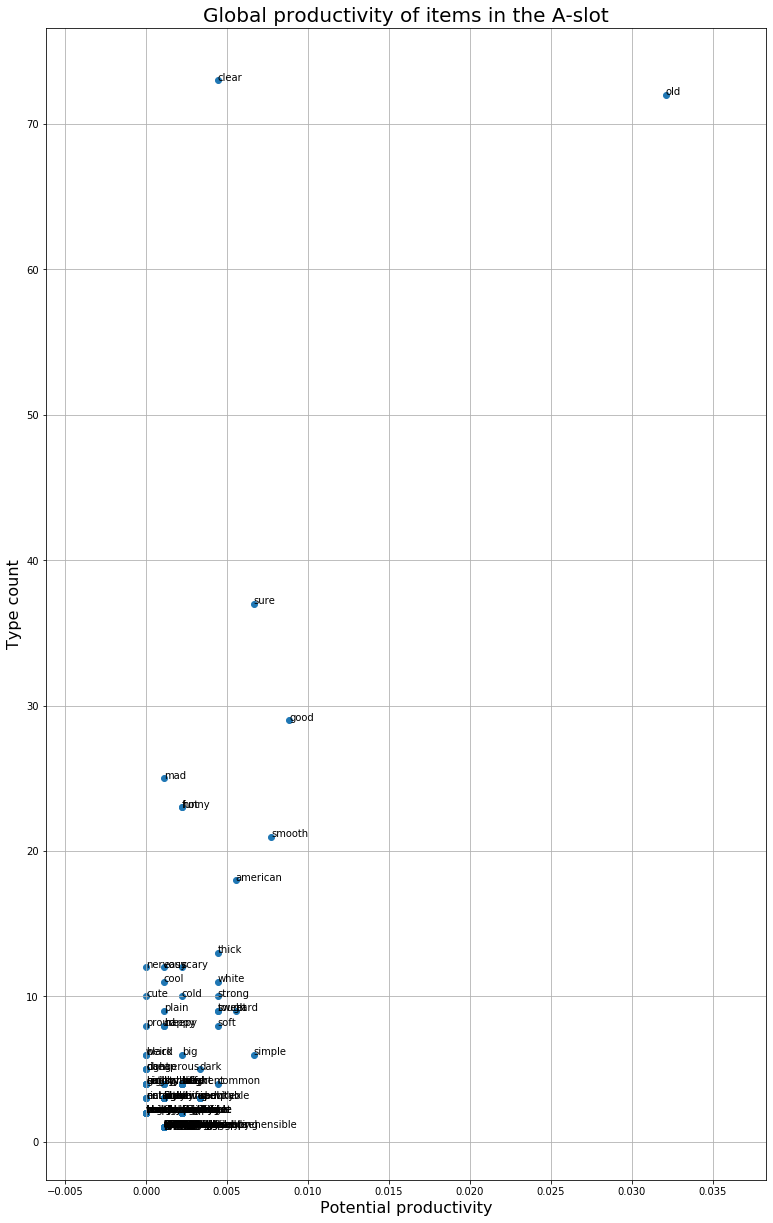

In [10]:
fig=plt.figure(figsize=(10, 4))
ax_a=fig.add_axes([0,1,1,4])
ax_a.scatter(adj_types['POTENTIAL_PRODUCTIVITY_A'], adj_types['V'])
plt.grid()

for i, txt in enumerate(adj_label):
    ax_a.annotate(txt, (adj_types['POTENTIAL_PRODUCTIVITY_A'].tolist()[i], adj_types['V'].tolist()[i]))
    
plt.title("Global productivity of items in the A-slot", fontsize=20)
plt.xlabel("Potential productivity", fontsize=16)
plt.ylabel("Type count", fontsize=16)